# 2019 Linear Regression with One Variable

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
(156, 9)


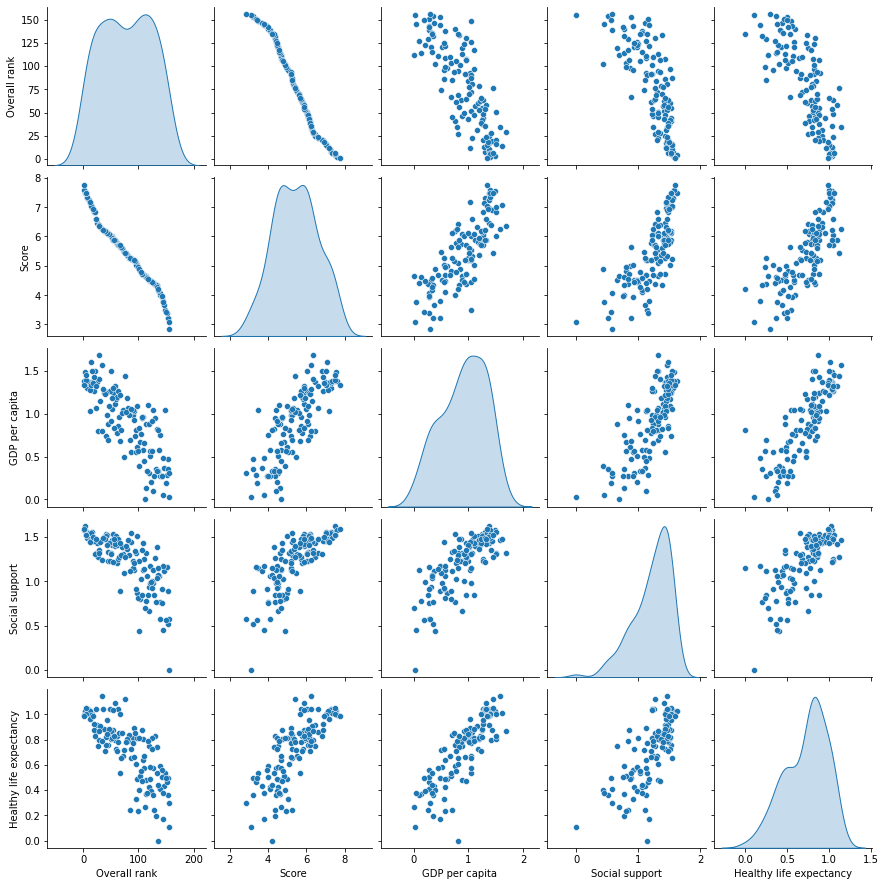

In [ ]:
#Importing the data 
# data2015 = pd.read_csv("2015.csv")
# data2016 = pd.read_csv("2016.csv")
# data2017 = pd.read_csv("2017.csv")
# data2018 = pd.read_csv("2018.csv")
data2019 = pd.read_csv("2019.csv")
# print(data2015.head(3))
# print(data2016.head(3))
# print(data2017.head(3))
# print(data2018.head(3))
print(data2019.head(3))
print(data2019.shape)

#I chose some columns to convert to dataframe
df = pd.DataFrame (data2019, columns = ['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy'])
#Dividing the data into training set and test set
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

# Plotting some graphs just to see the overall trend
sns.pairplot(train_dataset[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']], diag_kind='kde')

[[77.592  0.906  1.215  0.72 ]]
First example: [[27.    0.8   1.27  0.75]]

Normalized: [[-1.1  -0.26  0.18  0.1 ]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
None


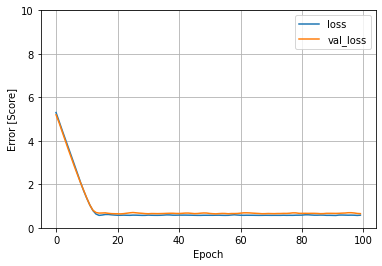

In [ ]:
#Some overall statistics
train_dataset.describe().transpose()

#Isolating the target value
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Score')
test_labels = test_features.pop('Score')

#Normalizing (I don't really understand this block of code :( )
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())



health = np.array(train_features['Healthy life expectancy'])

health_normalizer = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer.adapt(health)

health_model = tf.keras.Sequential([
    health_normalizer,
    layers.Dense(units=1)
])

print(health_model.summary())

health_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = health_model.fit(
    train_features['Healthy life expectancy'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Score]')
  plt.legend()
  plt.grid(True)


plot_loss(history)


test_results = {}

test_results['health_model'] = health_model.evaluate(
    test_features['Healthy life expectancy'],
    test_labels, verbose=0)

,Mean absolute error [Healthy life expectancy]
health_model,0.544174


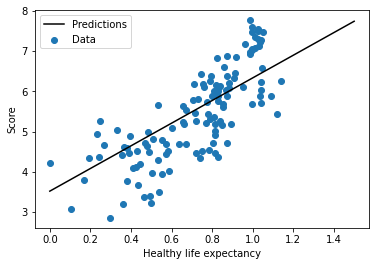

In [ ]:
x = tf.linspace(0.0, 1.5, 2)
y = health_model.predict(x)
def plot_health(x, y):
  plt.scatter(train_features['Healthy life expectancy'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Healthy life expectancy')
  plt.ylabel('Score')
  plt.legend()


plot_health(x, y)
pd.DataFrame(test_results, index=['Mean absolute error [Healthy life expectancy]']).T

# 2019 Neural Network Model

In [ ]:
def build_and_compile_modeldnn2019(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='linear'),
      layers.Dense(64, activation='linear'),
      layers.Dense(32, activation='linear'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


health_normalizer2019 = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer2019.adapt(health)

dnn_health_model2019 = build_and_compile_modeldnn2019(health_normalizer)
dnn_health_model2019.summary()

historydnn2019 = dnn_health_model2019.fit(
    train_features['Healthy life expectancy'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

In [ ]:
plot_loss(historydnn2019)

In [ ]:
x = tf.linspace(0.0, 2, 3)
y = dnn_health_model2019.predict(x)
plot_health(x, y)

In [ ]:
test_results = {}
test_results['dnn_health_model'] = dnn_health_model.evaluate(
    test_features['Healthy life expectancy'], test_labels,
    verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Healthy life expectancy]']).T

# 2018 Linear Regression with One Variable

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.632           1.305           1.592   
1             2            Norway  7.594           1.456           1.582   
2             3           Denmark  7.555           1.351           1.590   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.874                         0.681       0.202   
1                    0.861                         0.686       0.286   
2                    0.868                         0.683       0.284   

   Perceptions of corruption  
0                      0.393  
1                      0.340  
2                      0.408  
(156, 9)


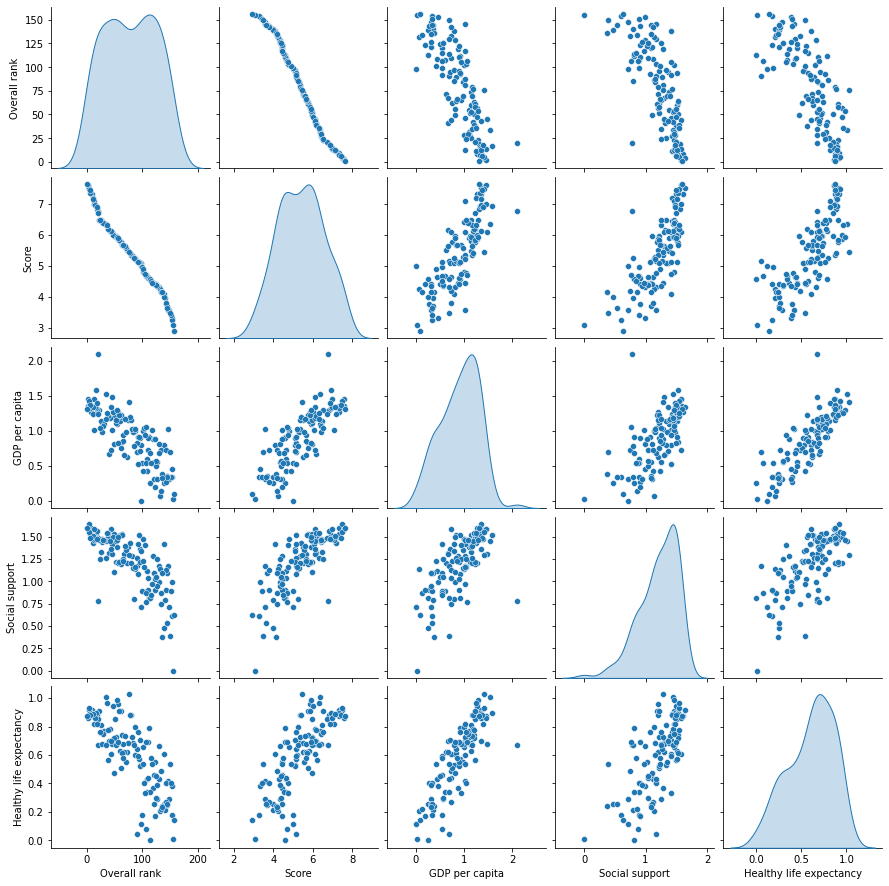

In [ ]:
#Importing the data 
# data2015 = pd.read_csv("2015.csv")
# data2016 = pd.read_csv("2016.csv")
# data2017 = pd.read_csv("2017.csv")
# data2018 = pd.read_csv("2018.csv")
data2018 = pd.read_csv("2018.csv")
# print(data2015.head(3))
# print(data2016.head(3))
# print(data2017.head(3))
# print(data2018.head(3))
print(data2018.head(3))
print(data2018.shape)

#I chose some columns to convert to dataframe
df5 = pd.DataFrame (data2018, columns = ['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy'])
#Dividing the data into training set and test set
train_dataset5 = df5.sample(frac=0.8, random_state=0)
test_dataset5 = df5.drop(train_dataset5.index)

# Plotting some graphs just to see the overall trend
sns.pairplot(train_dataset5[['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']], diag_kind='kde')

[[77.592  0.9    1.207  0.604]]
First example: [[27.    1.11  1.44  0.76]]

Normalized: [[-1.1   0.53  0.74  0.61]]
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_47 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_76 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
None


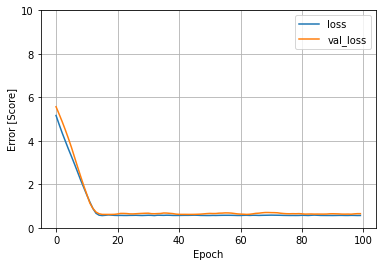

In [ ]:
#Some overall statistics
train_dataset5.describe().transpose()

#Isolating the target value
train_features5 = train_dataset5.copy()
test_features5 = test_dataset5.copy()

train_labels5 = train_features5.pop('Score')
test_labels5 = test_features5.pop('Score')

#Normalizing (I don't really understand this block of code :( )
normalizer5 = tf.keras.layers.Normalization(axis=-1)
normalizer5.adapt(np.array(train_features5))
print(normalizer5.mean.numpy())
first = np.array(train_features5[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer5(first).numpy())

health5 = np.array(train_features5['Healthy life expectancy'])

health_normalizer5 = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer5.adapt(health5)

health_model5 = tf.keras.Sequential([
    health_normalizer5,
    layers.Dense(units=1)
])

print(health_model5.summary())

health_model5.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history5 = health_model5.fit(
    train_features5['Healthy life expectancy'],
    train_labels5,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

hist5 = pd.DataFrame(history4.history)
hist5['epoch'] = history5.epoch
hist5.tail()

def plot_loss(history5):
  plt.plot(history5.history['loss'], label='loss')
  plt.plot(history5.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Score]')
  plt.legend()
  plt.grid(True)


plot_loss(history5)


test_results5 = {}

test_results5['health_model5'] = health_model5.evaluate(
    test_features5['Healthy life expectancy'],
    test_labels5, verbose=0)

,Mean absolute error [Healthy life expectancy]
health_model5,0.589196


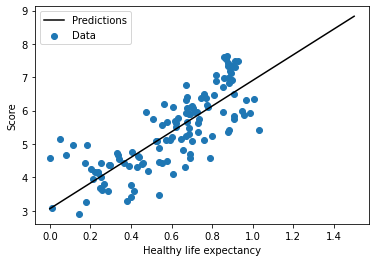

In [ ]:
x = tf.linspace(0.0, 1.5, 2)
y = health_model5.predict(x)
def plot_health5(x, y):
  plt.scatter(train_features5['Healthy life expectancy'], train_labels5, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Healthy life expectancy')
  plt.ylabel('Score')
  plt.legend()


plot_health5(x, y)
pd.DataFrame(test_results5, index=['Mean absolute error [Healthy life expectancy]']).T

# 2018 Neural Network Model

In [ ]:

def build_and_compile_modeldnn2018(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='linear'),
      layers.Dense(64, activation='linear'),
      layers.Dense(32, activation='linear'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


health_normalizer2018 = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer2018.adapt(health5)

dnn_health_model2018 = build_and_compile_modeldnn2018(health_normalizer5)
dnn_health_model2018.summary()

historydnn2018 = dnn_health_model2018.fit(
    train_features5['Healthy life expectancy'],
    train_labels5,
    validation_split=0.2,
    verbose=0, epochs=150)

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_47 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_100 (Dense)           (None, 128)               256       
                                                                 
 dense_101 (Dense)           (None, 64)                8256      
                                                                 
 dense_102 (Dense)           (None, 32)                2080      
                                                                 
 dense_103 (Dense)           (None, 1)                 33        
                                                                 
Total params: 10,628
Trainable params: 10,625
Non-trainable params: 3
_________________________________________________

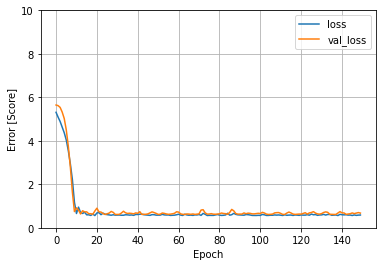

In [ ]:
plot_loss(historydnn2018)

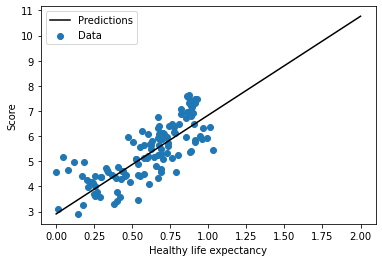

In [ ]:
x = tf.linspace(0.0, 2, 3)
y = dnn_health_model2018.predict(x)
plot_health5(x, y)

# 2017 Linear Regression with One Variable

In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [105]:
#Importing the data 
# data2015 = pd.read_csv("2015.csv")
# data2016 = pd.read_csv("2016.csv")
# data2017 = pd.read_csv("2017.csv")
# data2018 = pd.read_csv("2018.csv")
data2017 = pd.read_csv("2017.csv")
# print(data2015.head(3))
# print(data2016.head(3))
# print(data2017.head(3))
# print(data2018.head(3))
print(data2017.head(3))
print(data2017.shape)

#I chose some columns to convert to dataframe
df = pd.DataFrame (data2017, columns = ['Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.'])
#Dividing the data into training set and test set
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

# Plotting some graphs just to see the overall trend
# sns.pairplot(train_dataset[['Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.']], diag_kind='kde')

   Country  Happiness.Rank  Happiness.Score  Whisker.high  Whisker.low  \
0   Norway               1            7.537      7.594445     7.479556   
1  Denmark               2            7.522      7.581728     7.462272   
2  Iceland               3            7.504      7.622030     7.385970   

   Economy..GDP.per.Capita.    Family  Health..Life.Expectancy.   Freedom  \
0                  1.616463  1.533524                  0.796667  0.635423   
1                  1.482383  1.551122                  0.792566  0.626007   
2                  1.480633  1.610574                  0.833552  0.627163   

   Generosity  Trust..Government.Corruption.  Dystopia.Residual  
0    0.362012                       0.315964           2.277027  
1    0.355280                       0.400770           2.313707  
2    0.475540                       0.153527           2.322715  
(155, 12)


[[77.565  0.974  1.185  0.548]]
First example: [[27.    1.34  1.49  0.82]]

Normalized: [[-1.11  0.87  1.04  1.13]]
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_40 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_62 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
None


,Mean absolute error [Health..Life.Expectancy.]
health_model,0.551862


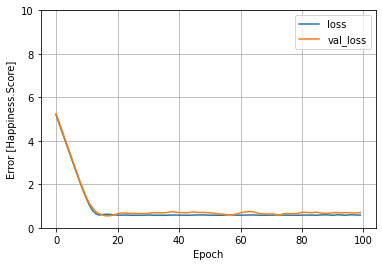

In [106]:
#Some overall statistics
train_dataset.describe().transpose()

#Isolating the target value
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Happiness.Score')
test_labels = test_features.pop('Happiness.Score')

#Normalizing (I don't really understand this block of code :( )
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())



health = np.array(train_features['Health..Life.Expectancy.'])

health_normalizer = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer.adapt(health)

health_model = tf.keras.Sequential([
    health_normalizer,
    layers.Dense(units=1)
])

print(health_model.summary())

health_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history = health_model.fit(
    train_features['Health..Life.Expectancy.'],
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Happiness.Score]')
  plt.legend()
  plt.grid(True)


plot_loss(history)


test_results = {}

test_results['health_model'] = health_model.evaluate(
    test_features['Health..Life.Expectancy.'],
    test_labels, verbose=0)

pd.DataFrame(test_results, index=['Mean absolute error [Health..Life.Expectancy.]']).T

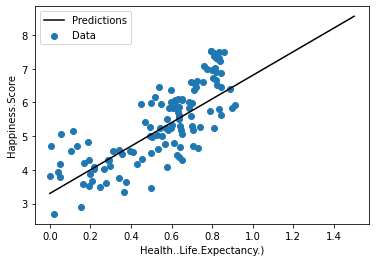

In [76]:
x = tf.linspace(0.0, 1.5, 2)
y = health_model.predict(x)
def plot_health(x, y):
  plt.scatter(train_features['Health..Life.Expectancy.'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Health..Life.Expectancy.)')
  plt.ylabel('Happiness.Score')
  plt.legend()


plot_health(x, y)

# 2017 Neural Network Model

In [111]:
def build_and_compile_modeldnn2017(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='linear'),
      layers.Dense(64, activation='linear'),
      layers.Dense(32, activation='linear'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


health_normalizer2017 = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer2017.adapt(health)

dnn_health_model2017 = build_and_compile_modeldnn2017(health_normalizer)
dnn_health_model2017.summary()

historydnn2017 = dnn_health_model2017.fit(
    train_features['Health..Life.Expectancy.'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_40 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_67 (Dense)            (None, 128)               256       
                                                                 
 dense_68 (Dense)            (None, 64)                8256      
                                                                 
 dense_69 (Dense)            (None, 32)                2080      
                                                                 
 dense_70 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10,628
Trainable params: 10,625
Non-trainable params: 3
_________________________________________________

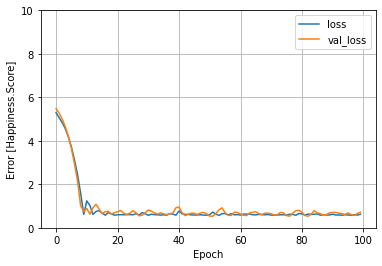

In [112]:
plot_loss(historydnn2017)

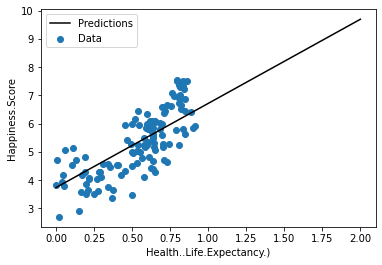

In [113]:
x = tf.linspace(0.0, 2, 3)
y = dnn_health_model2017.predict(x)
plot_health(x, y)

In [114]:
test_results = {}
test_results['dnn_health_model2017'] = dnn_health_model2017.evaluate(
    test_features['Health..Life.Expectancy.'], test_labels,
    verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error Health..Life.Expectancy.']).T

,Mean absolute error Health..Life.Expectancy.
dnn_health_model2017,0.571293


# 2016 Linear Regression with One Variable

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

       Country          Region  Happiness Rank  Happiness Score  \
0      Denmark  Western Europe               1            7.526   
1  Switzerland  Western Europe               2            7.509   
2      Iceland  Western Europe               3            7.501   

   Lower Confidence Interval  Upper Confidence Interval  \
0                      7.460                      7.592   
1                      7.428                      7.590   
2                      7.333                      7.669   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   
1                   1.52733  1.14524                   0.86303  0.58557   
2                   1.42666  1.18326                   0.86733  0.56624   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939  
1                        0.41203     0.28083            2.694

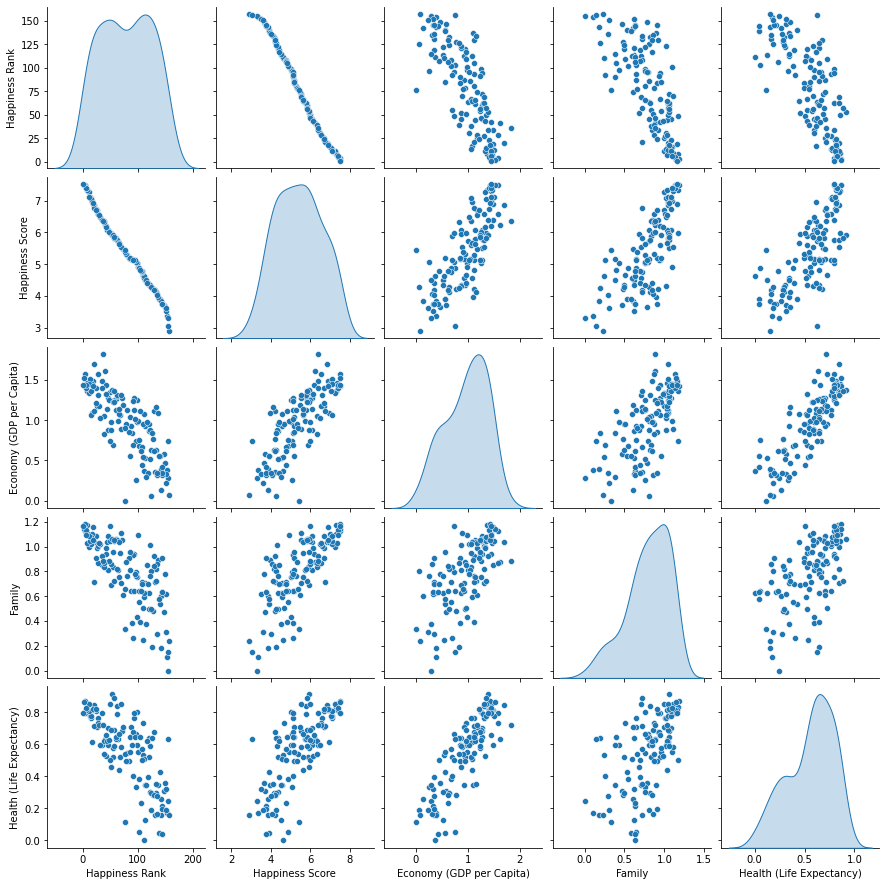

In [ ]:
#Importing the data 
# data2015 = pd.read_csv("2015.csv")
# data2016 = pd.read_csv("2016.csv")
# data2017 = pd.read_csv("2017.csv")
# data2018 = pd.read_csv("2018.csv")
data2016 = pd.read_csv("2016.csv")
# print(data2015.head(3))
# print(data2016.head(3))
# print(data2017.head(3))
# print(data2018.head(3))
print(data2016.head(3))
print(data2016.shape)

#I chose some columns to convert to dataframe
df4 = pd.DataFrame (data2016, columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'])
#Dividing the data into training set and test set
train_dataset4 = df4.sample(frac=0.8, random_state=0)
test_dataset4 = df4.drop(train_dataset4.index)

# Plotting some graphs just to see the overall trend
sns.pairplot(train_dataset4[['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']], diag_kind='kde')

[[78.159  0.964  0.794  0.557]]
First example: [[8.   1.36 1.17 0.83]]

Normalized: [[-1.52  0.96  1.41  1.2 ]]
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_44 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_71 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
None


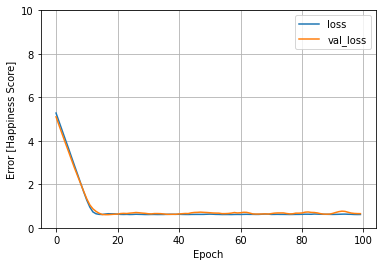

In [ ]:
#Some overall statistics
train_dataset4.describe().transpose()

#Isolating the target value
train_features4 = train_dataset4.copy()
test_features4 = test_dataset4.copy()

train_labels4 = train_features4.pop('Happiness Score')
test_labels4 = test_features4.pop('Happiness Score')

#Normalizing (I don't really understand this block of code :( )
normalizer4 = tf.keras.layers.Normalization(axis=-1)
normalizer4.adapt(np.array(train_features4))
print(normalizer4.mean.numpy())
first = np.array(train_features4[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer4(first).numpy())

health4 = np.array(train_features4['Health (Life Expectancy)'])

health_normalizer4 = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer4.adapt(health4)

health_model4 = tf.keras.Sequential([
    health_normalizer4,
    layers.Dense(units=1)
])

print(health_model4.summary())

health_model4.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history4 = health_model4.fit(
    train_features4['Health (Life Expectancy)'],
    train_labels4,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

hist4 = pd.DataFrame(history4.history)
hist4['epoch'] = history4.epoch
hist4.tail()

def plot_loss(history4):
  plt.plot(history4.history['loss'], label='loss')
  plt.plot(history4.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Happiness Score]')
  plt.legend()
  plt.grid(True)


plot_loss(history4)


test_results4 = {}

test_results4['health_model4'] = health_model4.evaluate(
    test_features4['Health (Life Expectancy)'],
    test_labels4, verbose=0)

,Mean absolute error [Healthy life expectancy]
health_model4,0.532029


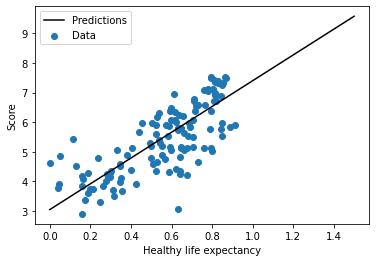

In [ ]:
x = tf.linspace(0.0, 1.5, 2)
y = health_model4.predict(x)
def plot_health4(x, y):
  plt.scatter(train_features4['Health (Life Expectancy)'], train_labels4, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Healthy life expectancy')
  plt.ylabel('Score')
  plt.legend()


plot_health4(x, y)
pd.DataFrame(test_results4, index=['Mean absolute error [Healthy life expectancy]']).T

# 2016 Neural Network Model

In [ ]:
def build_and_compile_modeldnn2016(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='linear'),
      layers.Dense(64, activation='linear'),
      layers.Dense(32, activation='linear'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


health_normalizer2016 = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer2016.adapt(health3)

dnn_health_model2016 = build_and_compile_modeldnn2016(health_normalizer4)
dnn_health_model2016.summary()

historydnn2016 = dnn_health_model2016.fit(
    train_features4['Health (Life Expectancy)'],
    train_labels4,
    validation_split=0.2,
    verbose=0, epochs=100)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_44 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_72 (Dense)            (None, 128)               256       
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
 dense_75 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10,628
Trainable params: 10,625
Non-trainable params: 3
_________________________________________________

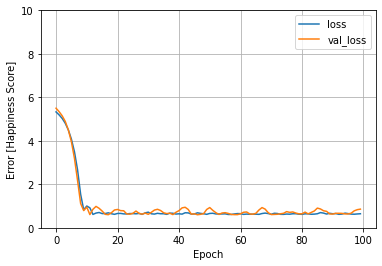

In [ ]:
plot_loss(historydnn2016)

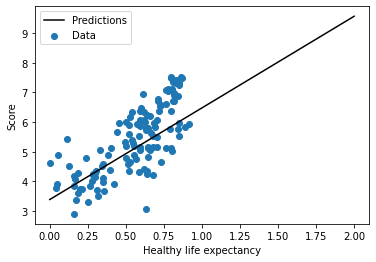

In [ ]:
x = tf.linspace(0.0, 2, 3)
y = dnn_health_model2016.predict(x)
plot_health4(x, y)

In [ ]:
test_results = {}
test_results['dnn_health_model2016'] = dnn_health_model2016.evaluate(
    test_features4['Health (Life Expectancy)'], test_labels4,
    verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Healthy life expectancy]']).T

,Mean absolute error [Healthy life expectancy]
dnn_health_model2016,0.485308


# 2015 Linear Regression with One Variable

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   
1                   0.94784  0.62877                        0.14145   
2                   0.87464  0.64938                        0.48357   

   Generosity  Dystopia Residual  
0     0.29678            2.51738  
1     0.43630            2.70201  
2     0.34139            2.49204  
(158, 12)


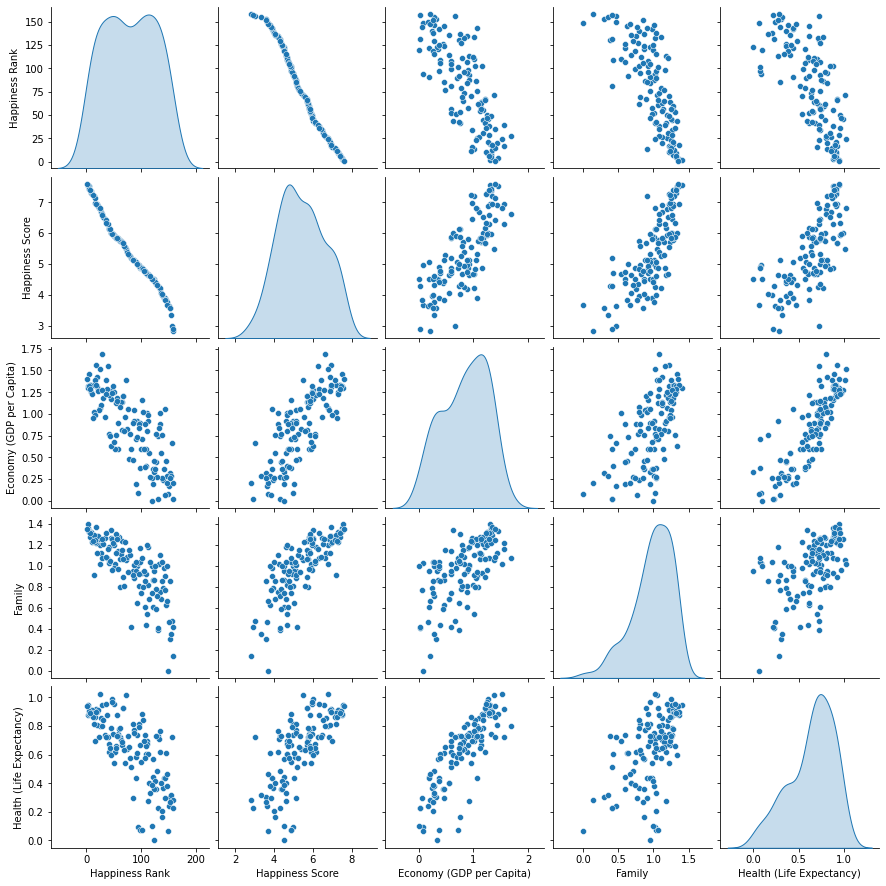

In [63]:
#Importing the data 
# data2015 = pd.read_csv("2015.csv")
# data2016 = pd.read_csv("2016.csv")
# data2017 = pd.read_csv("2017.csv")
# data2018 = pd.read_csv("2018.csv")
data2015 = pd.read_csv("2015.csv")
# print(data2015.head(3))
# print(data2016.head(3))
# print(data2017.head(3))
# print(data2018.head(3))
print(data2015.head(3))
print(data2015.shape)

#I chose some columns to convert to dataframe
df3 = pd.DataFrame (data2015, columns = ['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)'])

#Dividing the data into training set and test set
train_dataset3 = df3.sample(frac=0.8, random_state=0)
test_dataset3 = df3.drop(train_dataset3.index)

# Plotting some graphs just to see the overall trend
sns.pairplot(train_dataset3[['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)']], diag_kind='kde')

[[78.468  0.845  0.982  0.641]]
First example: [[8.   1.33 1.29 0.91]]

Normalized: [[-1.52  1.17  1.09  1.1 ]]
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_28 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________
None


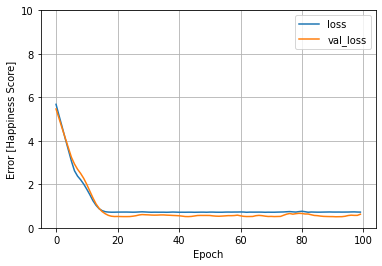

In [64]:
#Some overall statistics
train_dataset3.describe().transpose()

#Isolating the target value
train_features3 = train_dataset3.copy()
test_features3 = test_dataset3.copy()

train_labels3 = train_features3.pop('Happiness Score')
test_labels3 = test_features3.pop('Happiness Score')

#Normalizing (I don't really understand this block of code :( )
normalizer3 = tf.keras.layers.Normalization(axis=-1)
normalizer3.adapt(np.array(train_features3))
print(normalizer3.mean.numpy())
first = np.array(train_features3[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer3(first).numpy())

health3 = np.array(train_features3['Health (Life Expectancy)'])

health_normalizer3 = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer3.adapt(health)

health_model3 = tf.keras.Sequential([
    health_normalizer3,
    layers.Dense(units=1)
])

print(health_model3.summary())

health_model3.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

history3 = health_model3.fit(
    train_features3['Health (Life Expectancy)'],
    train_labels3,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

hist3 = pd.DataFrame(history3.history)
hist3['epoch'] = history3.epoch
hist3.tail()

def plot_loss(history3):
  plt.plot(history3.history['loss'], label='loss')
  plt.plot(history3.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Happiness Score]')
  plt.legend()
  plt.grid(True)


plot_loss(history3)


test_results3 = {}

test_results3['health_model3'] = health_model3.evaluate(
    test_features3['Health (Life Expectancy)'],
    test_labels3, verbose=0)

,Mean absolute error [Healthy life expectancy]
health_model3,0.570225


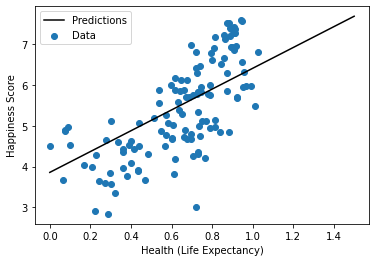

In [65]:
x = tf.linspace(0.0, 1.5, 2)
y = health_model3.predict(x)
def plot_health3(x, y):
  plt.scatter(train_features3['Health (Life Expectancy)'], train_labels3, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Health (Life Expectancy)')
  plt.ylabel('Happiness Score')
  plt.legend()

plot_health3(x, y)
pd.DataFrame(test_results3, index=['Mean absolute error [Healthy life expectancy]']).T

# 2015 Neural Network Model

In [66]:
def build_and_compile_modeldnn2015(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='linear'),
      layers.Dense(64, activation='linear'),
      layers.Dense(32, activation='linear'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model


health_normalizer2015 = layers.Normalization(input_shape=[1,], axis=None)
health_normalizer2015.adapt(health3)

dnn_health_model2015 = build_and_compile_modeldnn2015(health_normalizer3)
dnn_health_model2015.summary()

historydnn2015 = dnn_health_model2015.fit(
    train_features3['Health (Life Expectancy)'],
    train_labels3,
    validation_split=0.2,
    verbose=0, epochs=100)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_28 (Normaliza  (None, 1)                3         
 tion)                                                           
                                                                 
 dense_29 (Dense)            (None, 128)               256       
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 10,628
Trainable params: 10,625
Non-trainable params: 3
_________________________________________________

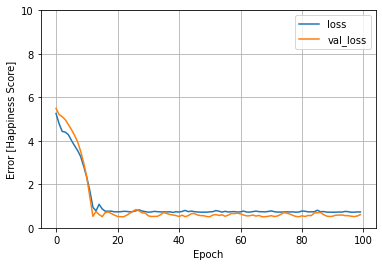

In [67]:
plot_loss(historydnn2015)

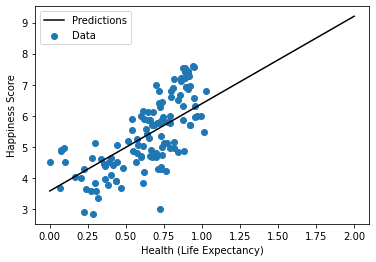

In [68]:
x = tf.linspace(0.0, 2, 3)
y = dnn_health_model2015.predict(x)
plot_health3(x, y)

In [72]:
test_results = {}
test_results['dnn_health_model2015'] = dnn_health_model2015.evaluate(
    test_features3['Health (Life Expectancy)'], test_labels3,
    verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [Healthy life expectancy]']).T

,Mean absolute error [Healthy life expectancy]
dnn_health_model2015,0.531867
